# AUTOENCODER FOR OUTLIER DETECTION

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

# Load traditional MNIST dataset.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

EPOCHS = 10 

# Scale the data.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Create and train an autoencoder.
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'),
      keras.layers.Dense(784, activation='sigmoid', kernel_initializer='glorot_normal', bias_initializer='zeros'),
      keras.layers.Reshape((28,28))
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(train_images, train_images, validation_data=(test_images, test_images),
                    epochs=EPOCHS, batch_size=64, verbose=2, shuffle=True)

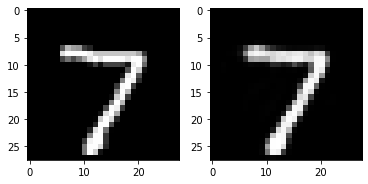

In [9]:
# Predict on test dataset.
predict_images = model.predict(test_images)
# Plot one input example and resulting prediction.
plt.subplot(1, 2, 1)
plt.imshow(test_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(predict_images[0], cmap=plt.get_cmap('gray'))
plt.show()

4431872/4422102 [==============================] - 0s 0us/step


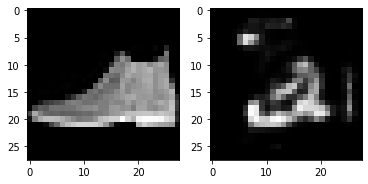

In [10]:
# Use the autoencoder to ascertain its results on the fashion mnist dataset.
# Load Fashion MNIST.
f_mnist = keras.datasets.fashion_mnist
(f_train_images, f_train_labels), (f_test_images,
f_test_labels) = f_mnist.load_data()
f_train_images = f_train_images / 255.0
f_test_images = f_test_images / 255.0
# Predict and plot.
f_predict_images = model.predict(f_test_images)
plt.subplot(1, 2, 1)
plt.imshow(f_test_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(f_predict_images[0], cmap=plt.get_cmap('gray'))
plt.show()

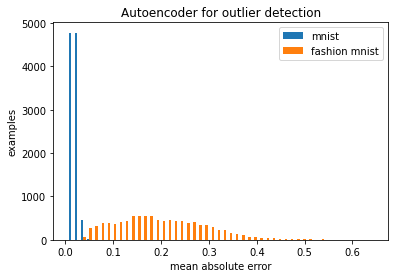

In [11]:
# Compute errors and plot.
error = np.mean(np.abs(test_images - predict_images), (1, 2))
f_error = np.mean(np.abs(f_test_images - f_predict_images), (1, 2))
_ = plt.hist((error, f_error), bins=50, label=['mnist', 'fashion mnist'])
plt.legend()
plt.xlabel('mean absolute error')
plt.ylabel('examples')
plt.title("Autoencoder for outlier detection")
plt.show()

Outlier threshold could be set at about 0.02